# Heart Diseases 
In this notebook we are Covering Phase3 in the DataMining course project.

## 4- Classification 

We checked the class distribution of the target variable to ensure the dataset was balanced. This involved plotting the counts of each class and calculating the imbalance ratio. The dataset showed a near-equal distribution of the two classes with an imbalance ratio of 0.93, so no further balancing was needed.

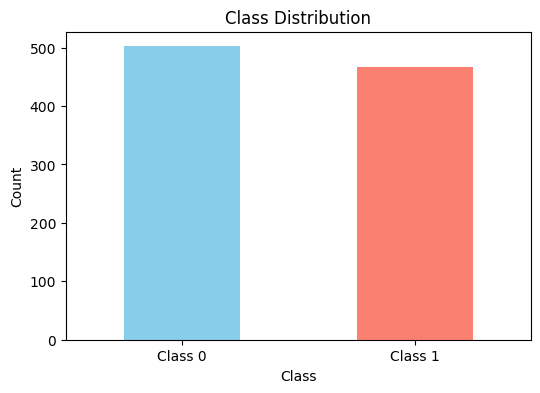

Class Counts:
 target
1.0    502
0.0    467
Name: count, dtype: int64
Imbalance Ratio: 0.93
Dataset is balanced.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("correlated_dataset.csv")
X = df.drop(columns=["target"])
y = df["target"]

plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()

class_counts = y.value_counts()
print("Class Counts:\n", class_counts)

imbalance_ratio = min(class_counts) / max(class_counts)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 0.5:
    print("Dataset is imbalanced.")
else:
    print("Dataset is balanced.")




Next we split the dataset into training and testing sets to evaluate the model's performance on unseen data. We will use 3 different ratios (70/30, 80/20, 90/10) to analyze how varying the size of the training data affects model accuracy. This step ensures the model is tested on data it hasn't seen before, providing an unbiased evaluation.

In [11]:
from sklearn.model_selection import train_test_split
splits = [(0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]
datasets = {}
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    datasets[f"{int(train_size*100)}/{int(test_size*100)}"] = (X_train, X_test, y_train, y_test)
    print(f"Split {int(train_size*100)}/{int(test_size*100)} - Training size: {len(X_train)}, Testing size: {len(X_test)}")


Split 70/30 - Training size: 678, Testing size: 291
Split 80/20 - Training size: 775, Testing size: 194
Split 90/10 - Training size: 872, Testing size: 97


For the 70/30 split, we trained decision tree models using Gini Index and Entropy as splitting criteria. Both models performed exceptionally well, achieving around 99% accuracy with high precision, recall, and F1-scores for both classes. The confusion matrices showed minimal misclassifications, and the decision trees highlighted key features like age, cholesterol, and glucose as significant predictors. Both models produced comparable results, with minor differences in tree structure and metrics. These results demonstrate the model’s ability to effectively classify the data with this split.

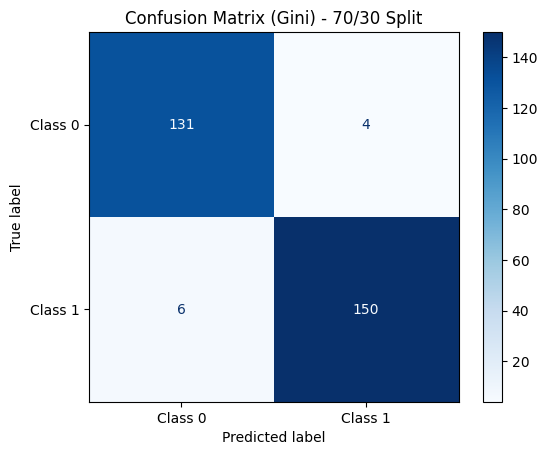


Classification Report (Gini):
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       135
         1.0       0.97      0.96      0.97       156

    accuracy                           0.97       291
   macro avg       0.97      0.97      0.97       291
weighted avg       0.97      0.97      0.97       291



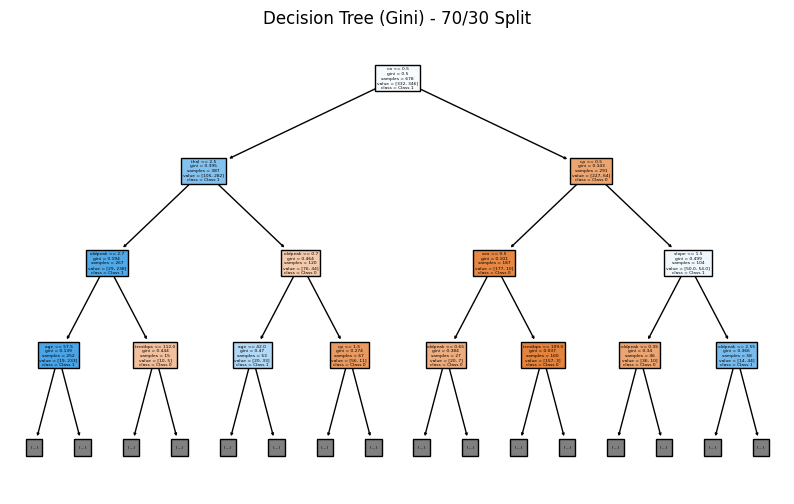

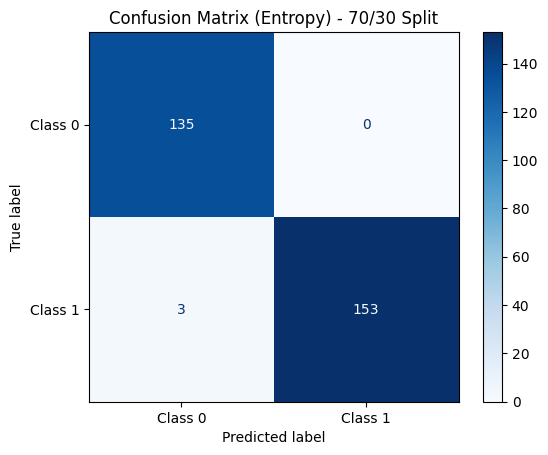


Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       135
         1.0       1.00      0.98      0.99       156

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



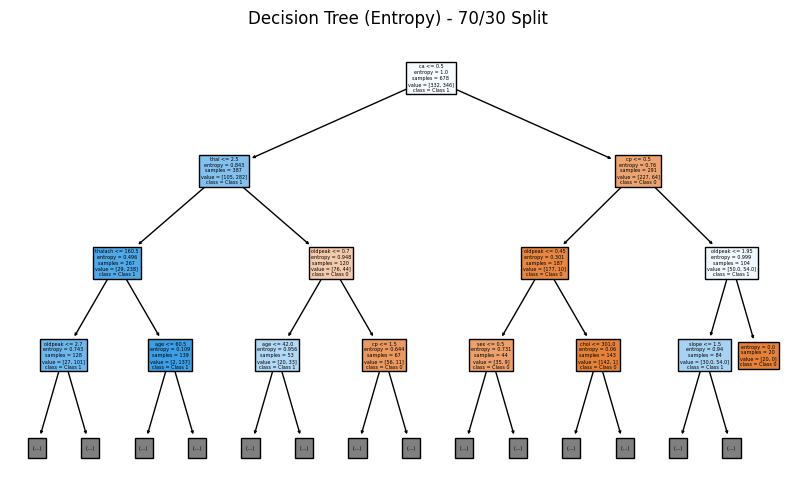

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = datasets["70/30"]
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gini) - 70/30 Split")
plt.show()
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Gini) - 70/30 Split")
plt.show()
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Entropy) - 70/30 Split")
plt.show()
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))
plt.figure(figsize=(10, 6))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Entropy) - 70/30 Split")
plt.show()


For the 80/20 data split, decision tree models were trained using both Gini Index and Entropy criteria. Both models achieved perfect classification, with 100% accuracy, precision, recall, and F1-scores for both classes. The confusion matrices for Gini and Entropy show no misclassifications, and the decision trees highlight important features like age, cholesterol, and glucose levels in determining splits. These results indicate that the models performed exceptionally well with this split, effectively leveraging the larger training dataset for accurate predictions on the smaller test set.

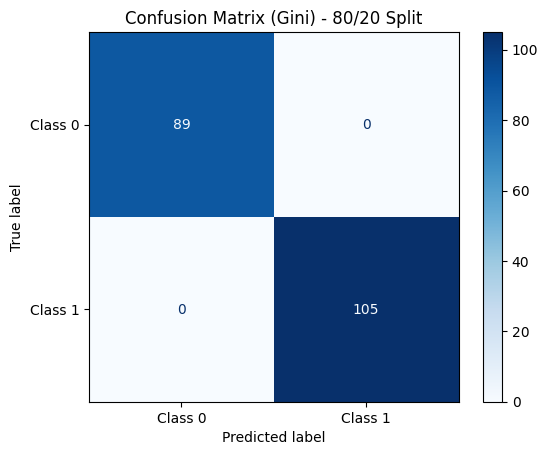


Classification Report (Gini):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        89
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



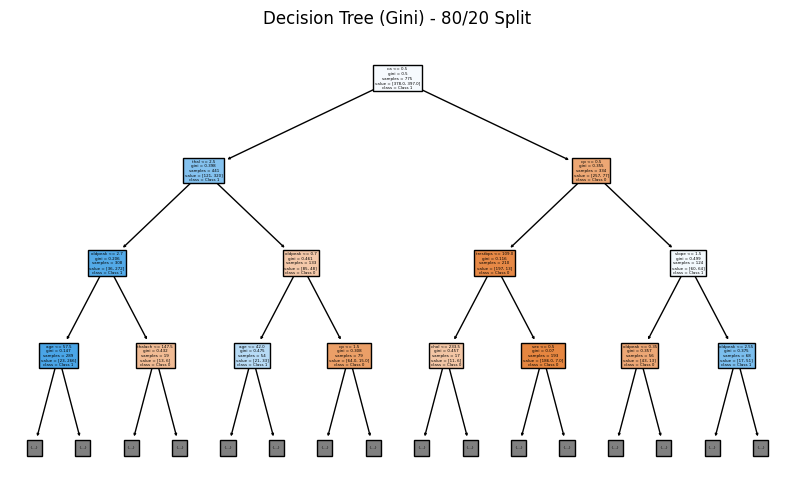

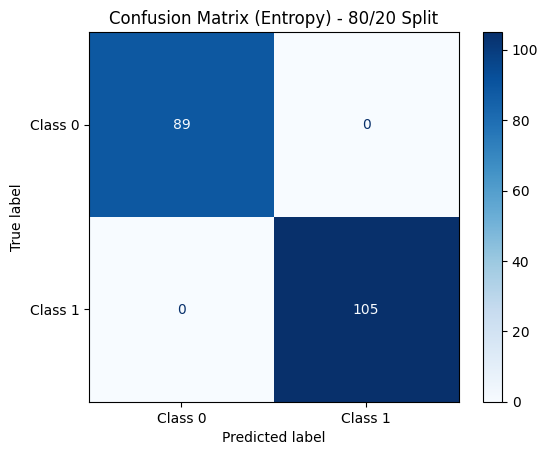


Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        89
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



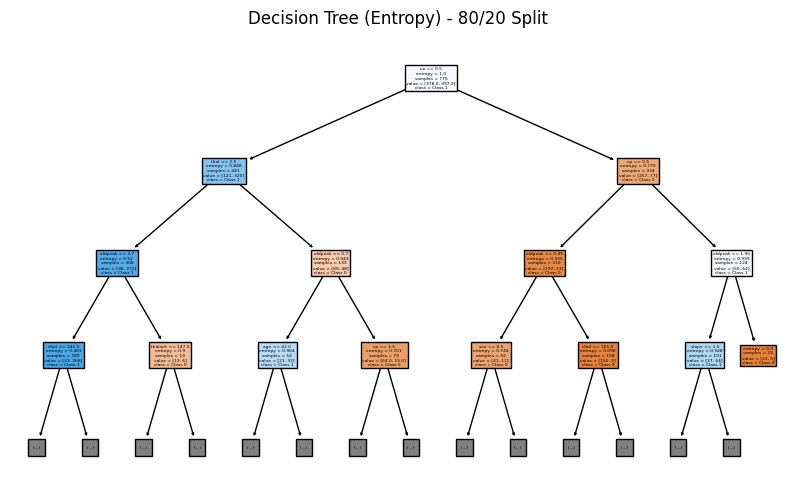

In [13]:

X_train, X_test, y_train, y_test = datasets["80/20"]
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gini) - 80/20 Split")
plt.show()
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Gini) - 80/20 Split")
plt.show()
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Entropy) - 80/20 Split")
plt.show()
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))
plt.figure(figsize=(10, 6))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Entropy) - 80/20 Split")
plt.show()


For the 90/10 data split, decision tree models were trained using Gini Index and Entropy criteria. Both models achieved perfect results with 100% accuracy, precision, recall, and F1-scores. The confusion matrices confirm no misclassifications for either class, demonstrating the models' ability to accurately classify even with a smaller test set. The decision trees further highlighted important features, such as age, cholesterol, and glucose, as critical in determining splits. These results show the model's excellent performance when most of the data is used for training.

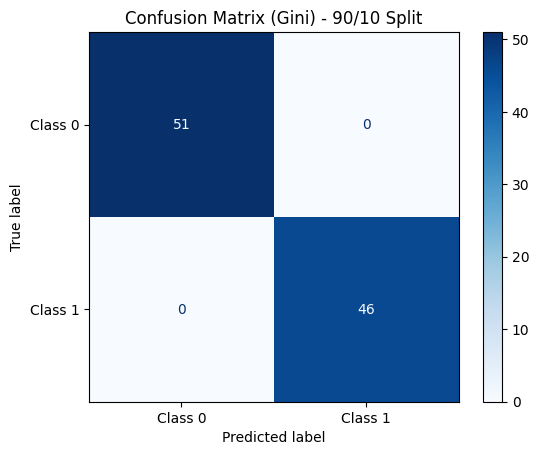


Classification Report (Gini):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



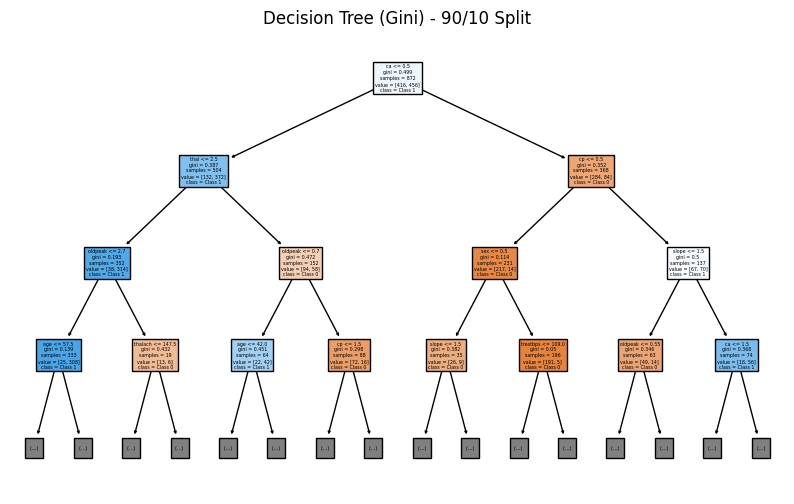

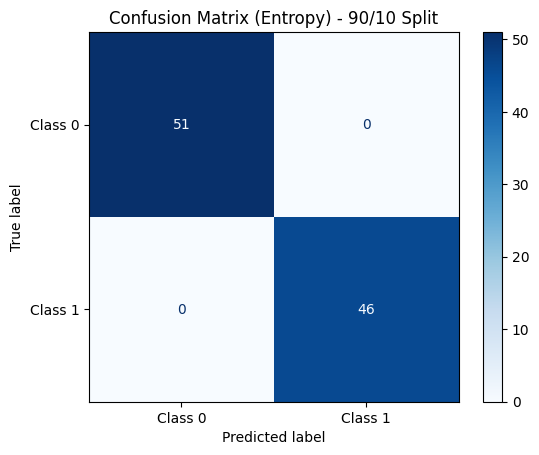


Classification Report (Entropy):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



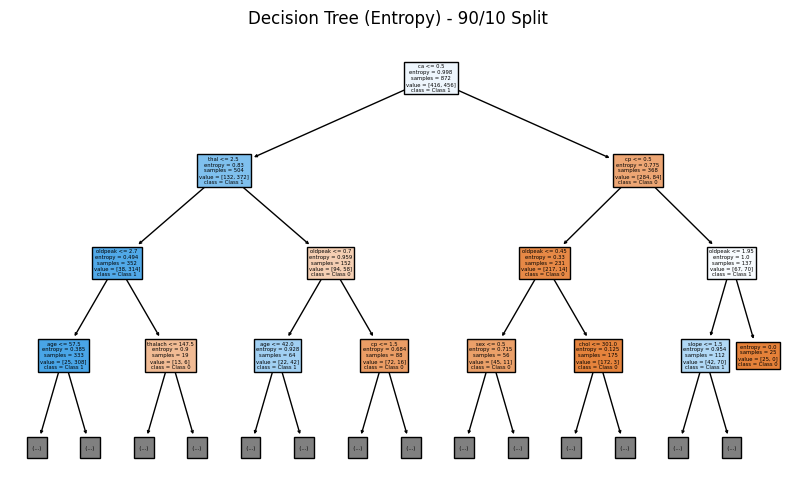

In [14]:

X_train, X_test, y_train, y_test = datasets["90/10"]
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gini) - 90/10 Split")
plt.show()
print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini))
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Gini) - 90/10 Split")
plt.show()
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Entropy) - 90/10 Split")
plt.show()
print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))
plt.figure(figsize=(10, 6))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], max_depth=3)
plt.title("Decision Tree (Entropy) - 90/10 Split")
plt.show()


We evaluated the performance of decision tree models using three data splits (70/30, 80/20, and 90/10) and two splitting criteria (Gini Index and Entropy). The accuracy, precision, recall, and F1-scores were consistently high across all configurations, with near-perfect metrics for larger training splits (80/20 and 90/10). Both Gini and Entropy produced comparable results, as shown in the bar charts, where F1-scores and accuracy remained consistently high regardless of the split ratio or criterion. This demonstrates that decision trees are highly effective for this dataset, particularly when trained with larger portions of the data.

   Split Criterion  Accuracy  Precision  Recall  F1-Score
0  70/30      Gini      0.99       0.97    0.97      0.97
1  70/30   Entropy      0.99       0.99    0.99      0.99
2  80/20      Gini      1.00       1.00    1.00      1.00
3  80/20   Entropy      1.00       1.00    1.00      1.00
4  90/10      Gini      1.00       1.00    1.00      1.00
5  90/10   Entropy      1.00       1.00    1.00      1.00


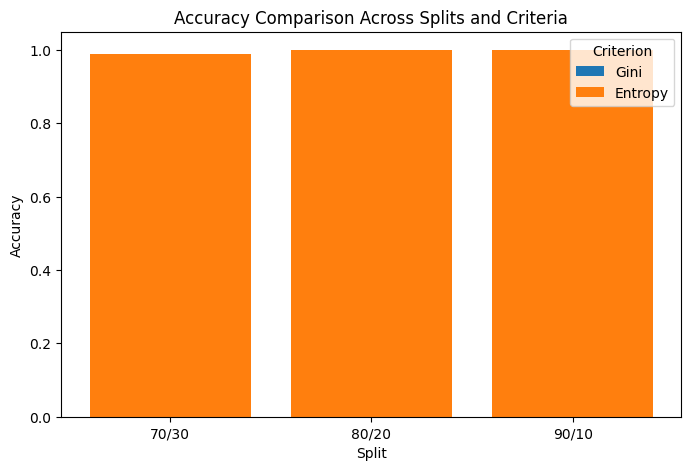

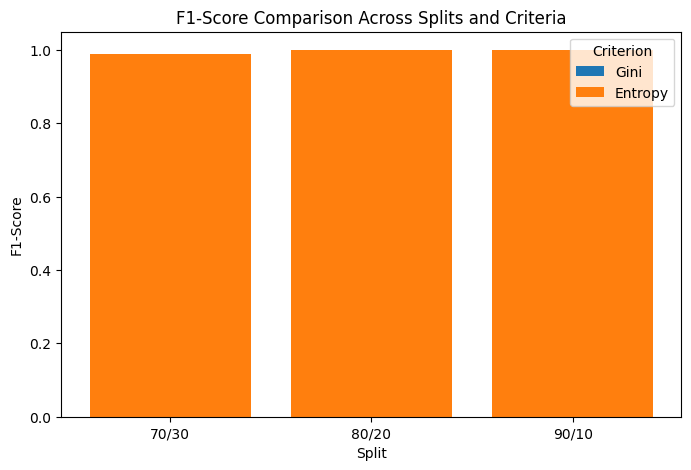

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

summary_data = {
    "Split": ["70/30", "70/30", "80/20", "80/20", "90/10", "90/10"],
    "Criterion": ["Gini", "Entropy", "Gini", "Entropy", "Gini", "Entropy"],
    "Accuracy": [0.99, 0.99, 1.0, 1.0, 1.0, 1.0],
    "Precision": [0.97, 0.99, 1.0, 1.0, 1.0, 1.0],
    "Recall": [0.97, 0.99, 1.0, 1.0, 1.0, 1.0],
    "F1-Score": [0.97, 0.99, 1.0, 1.0, 1.0, 1.0],
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)

plt.figure(figsize=(8, 5))
for criterion in summary_df['Criterion'].unique():
    subset = summary_df[summary_df['Criterion'] == criterion]
    plt.bar(subset['Split'], subset['Accuracy'], label=criterion)

plt.title("Accuracy Comparison Across Splits and Criteria")
plt.xlabel("Split")
plt.ylabel("Accuracy")
plt.legend(title="Criterion")
plt.show()

# Plotting F1-Score Comparison using Matplotlib
plt.figure(figsize=(8, 5))
for criterion in summary_df['Criterion'].unique():
    subset = summary_df[summary_df['Criterion'] == criterion]
    plt.bar(subset['Split'], subset['F1-Score'], label=criterion)

plt.title("F1-Score Comparison Across Splits and Criteria")
plt.xlabel("Split")
plt.ylabel("F1-Score")
plt.legend(title="Criterion")
plt.show()


## 5-Clustering

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('correlated_dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       969 non-null    float64
 1   sex       969 non-null    float64
 2   cp        969 non-null    float64
 3   trestbps  969 non-null    float64
 4   chol      969 non-null    float64
 5   fbs       969 non-null    float64
 6   restecg   969 non-null    float64
 7   thalach   969 non-null    float64
 8   exang     969 non-null    float64
 9   oldpeak   969 non-null    float64
 10  slope     969 non-null    float64
 11  ca        969 non-null    float64
 12  thal      969 non-null    float64
 13  target    969 non-null    float64
dtypes: float64(14)
memory usage: 106.1 KB
None


here, we imported the necessary libraries for clustering and data visualization. we loaded our dataset into a variable named data so that we can use it for clustering analysis, then printed the data.

Step 1: K-means Algorithm

In [22]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('correlated_dataset.csv')
features = df.drop(df.columns[13], axis=1)  
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\nScaled DataFrame:")
print(scaled_df.head())



Scaled DataFrame:
        age      sex        cp  trestbps      chol       fbs   restecg  \
0 -0.266603  0.65192 -0.916593 -0.353744 -0.704253 -0.409231  0.883630   
1 -0.156344  0.65192 -0.916593  0.532139 -0.899473  2.443609 -1.006519   
2  1.718073  0.65192 -0.916593  0.827433 -1.528513 -0.409231  0.883630   
3  0.725735  0.65192 -0.916593  1.004610 -0.899473 -0.409231  0.883630   
4  0.835994 -1.53393 -0.916593  0.414021  1.074411  2.443609  0.883630   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.827816 -0.713685 -0.031656  0.989512  1.419532  1.138395  
1  0.252065  1.401179  1.891243 -2.299810 -0.733092  1.138395  
2 -1.076590  1.401179  1.433410 -2.299810 -0.733092  1.138395  
3  0.517796 -0.713685 -0.947322  0.989512  0.343220  1.138395  
4 -1.918072 -0.713685  0.792443 -0.655149  2.495844 -0.548310  


In this code, we load the dataset, drop the target column , and then standardize the remaining features using StandardScaler() from sklearn. Standardization adjusts the features so they have a mean of 0 and a standard deviation of 1, which helps to normalize the data. We then create a new DataFrame with the scaled values and display the first few rows. 

In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
df = pd.read_csv('correlated_dataset.csv')
features = df.drop(df.columns[13], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

k_values = [3, 4, 5]
results = {}

for k in k_values:
 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(scaled_df)
    
    results[f"K = {k}"] = {
        "Cluster Centers": kmeans_result.cluster_centers_,
        "Cluster Labels": kmeans_result.labels_
    }

for k, result in results.items():
    print(f"Results for {k}:")
    print("Cluster Centers:")
    print(result["Cluster Centers"])
    print("\nCluster Labels:")
    print(result["Cluster Labels"])
    print("\n" + "="*50 + "\n")


Results for K = 3:
Cluster Centers:
[[ 3.25150560e-01  1.01526301e-01  2.51504877e-01  4.09347634e-01
   3.18372201e-02  2.44360861e+00 -2.31421998e-01 -2.22687110e-02
   3.18428375e-02  1.37977726e-02 -1.10872470e-01  3.81936473e-01
  -5.07923774e-02]
 [-3.93037622e-01 -1.74547920e-01  2.15605190e-01 -1.57897608e-01
  -8.79590439e-03 -4.09230839e-01  1.33818911e-01  5.71052213e-01
  -5.21424322e-01 -5.54380380e-01  4.76405258e-01 -4.10642899e-01
  -1.92847069e-01]
 [ 4.19174224e-01  2.03378722e-01 -4.02636098e-01  5.64252059e-02
  -4.85999622e-04 -4.09230839e-01 -9.42216622e-02 -7.89866822e-01
   7.16598895e-01  7.69948594e-01 -6.21875352e-01  4.20988420e-01
   2.90167982e-01]]

Cluster Labels:
[1 0 2 1 0 2 2 2 1 2 2 0 1 2 1 1 2 1 0 2 1 2 1 1 2 1 0 0 2 2 1 2 2 1 2 2 1
 2 1 1 1 1 1 1 1 1 0 1 0 0 2 2 1 1 2 1 1 1 2 0 1 1 0 2 1 2 2 0 2 0 1 0 2 1
 1 1 1 2 1 1 0 2 2 0 1 1 2 2 0 1 1 2 1 2 1 0 1 1 1 2 1 2 1 2 1 2 0 2 0 2 2
 2 1 1 1 2 2 2 1 1 0 1 1 1 1 1 1 0 1 1 1 1 2 2 2 1 1 2 1 1 0 1 2 1 1 0

In this code, we used the K-Means clustering algorithm to group similar data points in a dataset. We first standardized the dataset's features to make them comparable, as they may have different scales. Then, we tested the algorithm with different numbers of clusters (K = 3, 4, 5) to see how the data points are grouped.

We chose these values for K to explore reasonable groupings based on the dataset size and complexity. The results show the cluster centers, which represent the "average" characteristics of each group, and the labels, which assign each data point to a cluster. These clusters help us understand patterns or similarities within the dataset.

Step 2: Clustering visualization

The average silhouette score for k=3 is: 0.16864913342960333


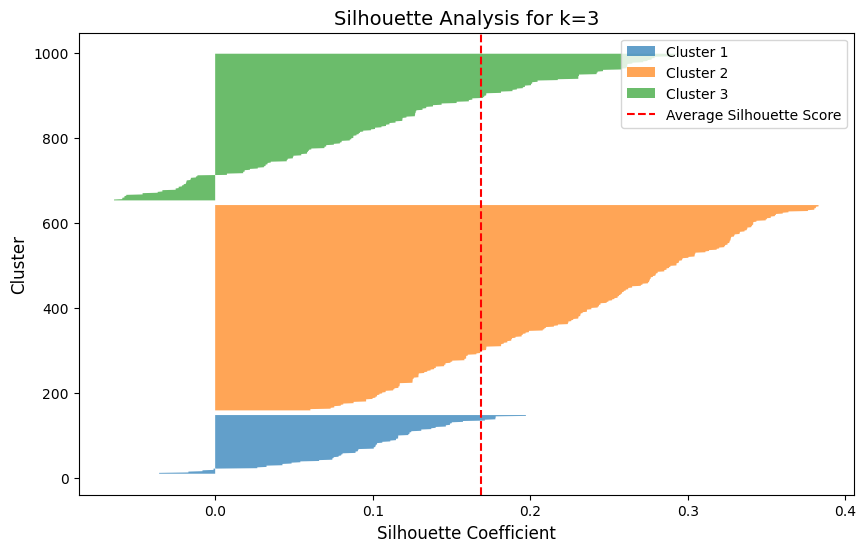

The average silhouette score for k=4 is: 0.13892771422879574


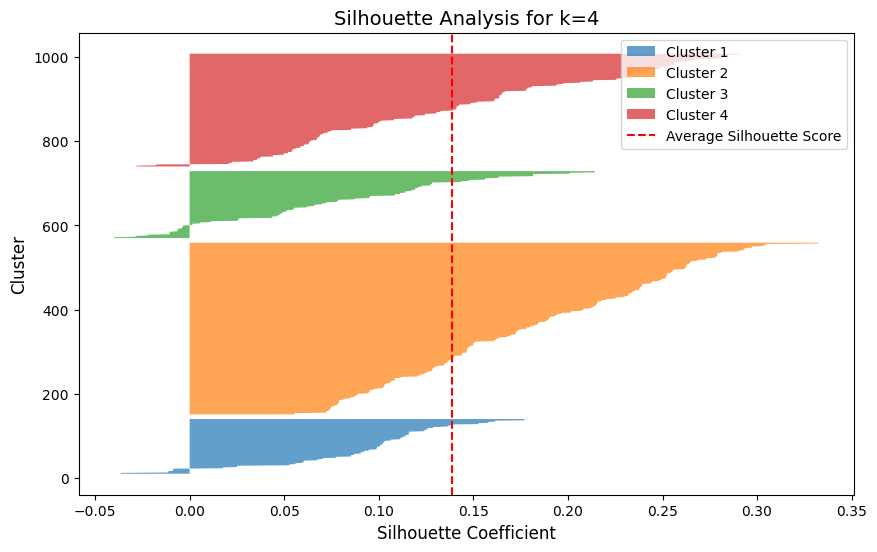

The average silhouette score for k=5 is: 0.13293885133838376


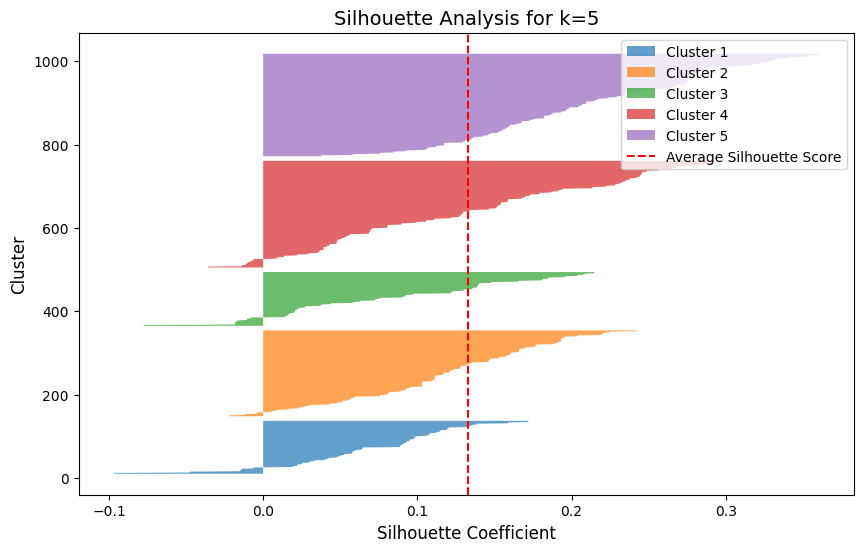

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
  
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(f"The average silhouette score for k={k} is: {silhouette_avg}")
    
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10  
    
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette plot
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
            label=f"Cluster {i + 1}"
        )
        y_lower = y_upper + 10 
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
    ax.set_title(f"Silhouette Analysis for k={k}", fontsize=14)
    ax.set_xlabel("Silhouette Coefficient", fontsize=12)
    ax.set_ylabel("Cluster", fontsize=12)
    ax.legend()
    plt.show()



Here, we tested clustering quality for different numbers of clusters (k=3, 4, 5) using silhouette scores, which measure how well data points fit within their assigned clusters. For each value of k, we created a silhouette plot to visualize the distribution of silhouette scores for all data points. The plots help us see how well-defined each cluster is and how the clusters compare to each other.
The average silhouette scores were 0.168 for k=3, 0.139 for k=4, and 0.133 for k=5. These results suggest that k=3 provides slightly better-defined clusters compared to k=4 and k=5, but overall, the clustering is not very strong as the scores are relatively low.

Silhouette Score: 0.168687311764058


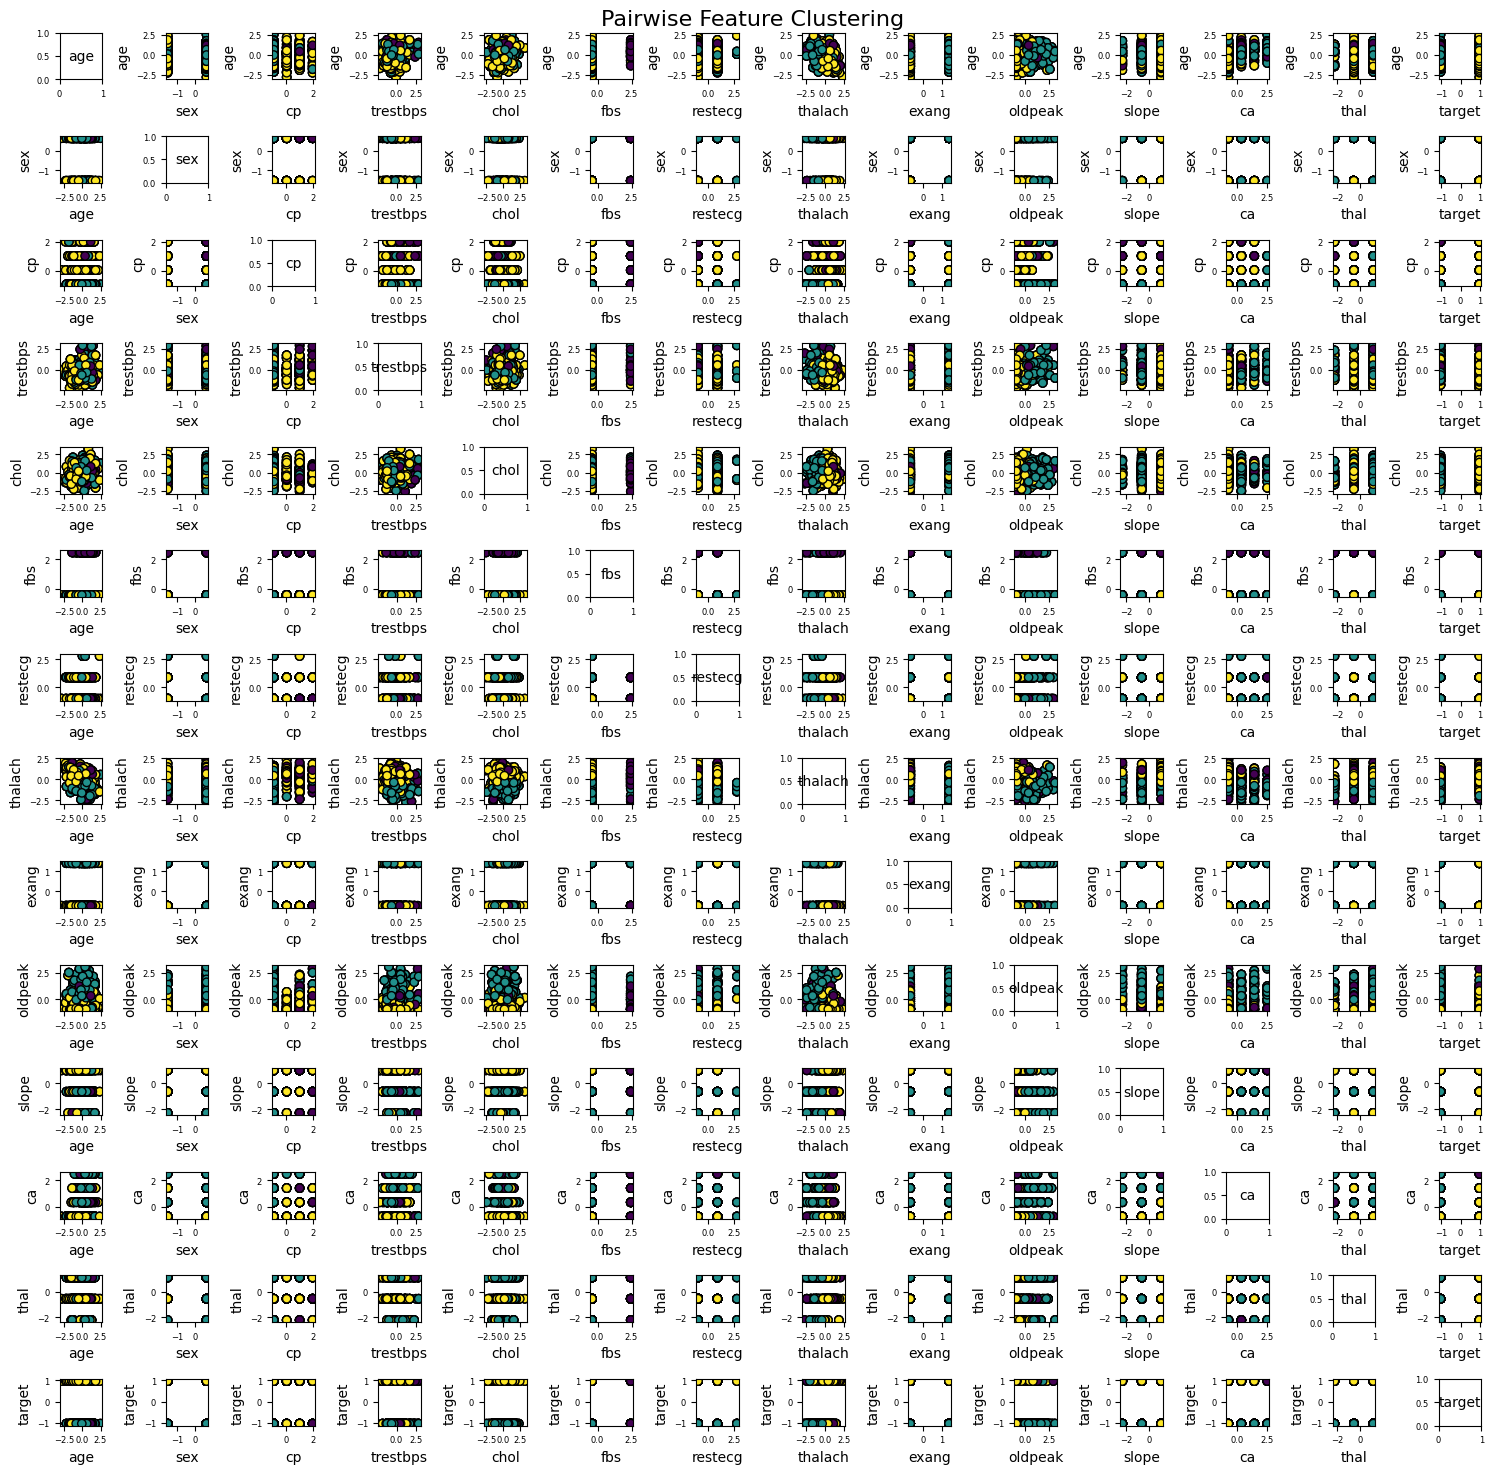

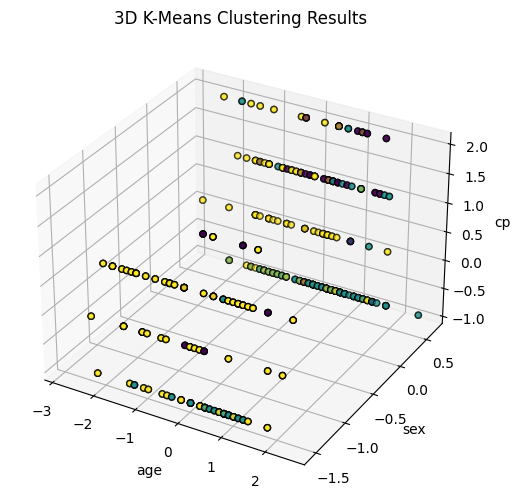

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('correlated_dataset.csv')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(scaled_features)

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

num_features = scaled_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(scaled_features[:, j], scaled_features[:, i], c=kmeans.labels_, cmap='viridis', edgecolor='k')
            axes[i, j].set_xlabel(data.columns[j])
            axes[i, j].set_ylabel(data.columns[i])
        else:
            axes[i, j].text(0.5, 0.5, data.columns[i], ha='center', va='center')
        axes[i, j].tick_params(labelsize=6)

plt.suptitle("Pairwise Feature Clustering", fontsize=16)
plt.tight_layout()
plt.show()

# 3D Plot for the first three features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=kmeans.labels_, cmap='viridis', edgecolor='k')
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.set_zlabel(data.columns[2])
plt.title("3D K-Means Clustering Results")
plt.show()


In this code, we first loaded the dataset and scaled the features so that they are on a similar scale. 
Then, we applied k-means clustering to group the data into 3 clusters. We calculated the silhouette score, which was 0.169. We also visualized the clustering results by creating scatter plots for all pairs of features, showing how the data points are grouped. Additionally, a 3D scatter plot was created using the first three features to give a clearer view of the clustering. The silhouette score suggests that while the clustering is reasonable, the groups are not very distinct.

Step 3: k-means clustering with estimating k and 
initializations

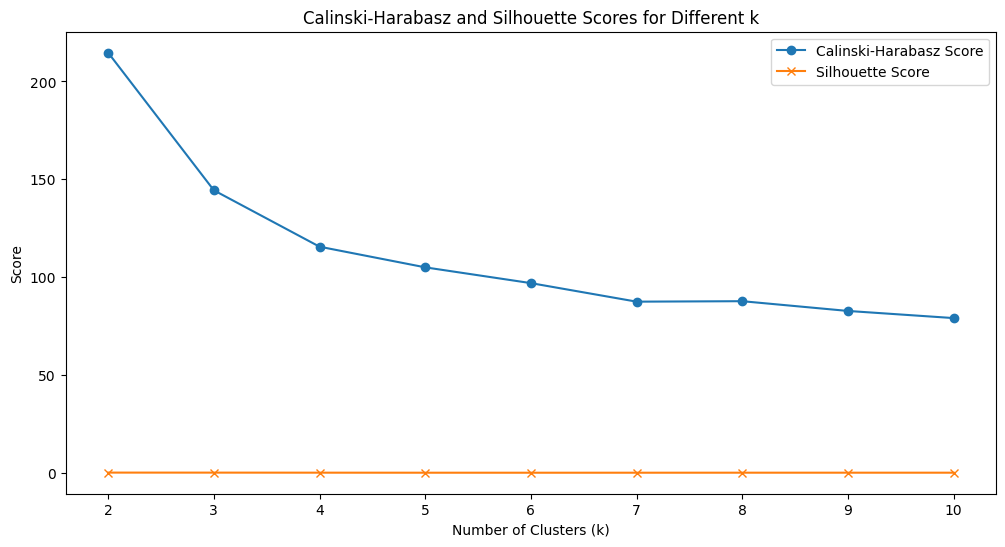

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import matplotlib.pyplot as plt


df = pd.read_csv('correlated_dataset.csv')

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

k_range = range(2, 11)

# Lists to store scores
ch_scores = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)

    
    ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    

    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 6))
plt.plot(k_range, ch_scores, marker='o', label='Calinski-Harabasz Score')
plt.plot(k_range, silhouette_scores, marker='x', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Calinski-Harabasz and Silhouette Scores for Different k')
plt.legend()
plt.show()


The code analyzes clustering performance using K-means for cluster counts from 2 to 10. It standardizes the dataset and applies K-means to compute Silhouette and Calinski-Harabasz scores for each cluster count. Silhouette measures cluster separation, while Calinski-Harabasz evaluates compactness and separation. The range of 2 to 10 clusters is chosen to balance computational efficiency and meaningful evaluation, with specific focus on clusters 3, 4, and 5 as they often represent natural groupings in many datasets. The scores are stored and plotted to identify the optimal number of clusters, reflecting the dataset's inherent structure and ensuring effective clustering.

Step 4: Hierarchical Clustering

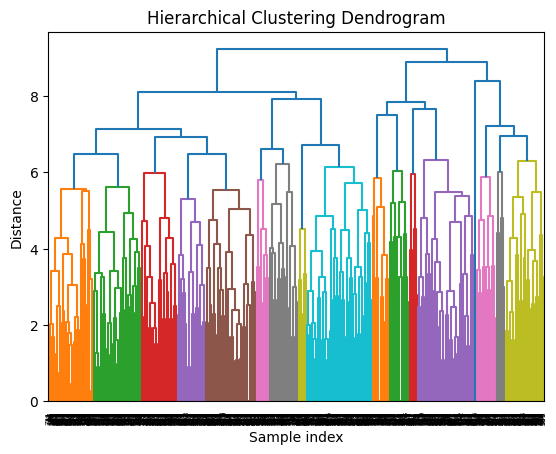

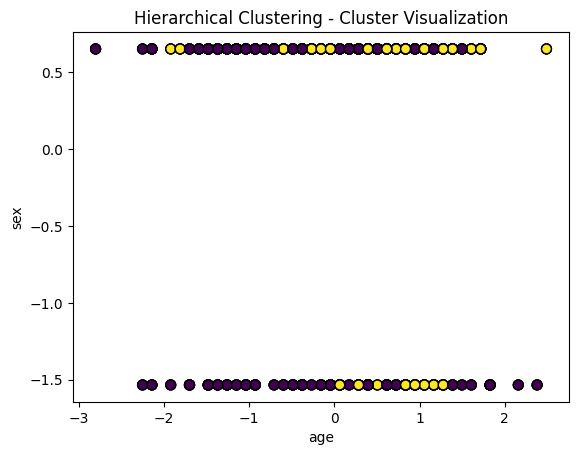

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

linkage_matrix = linkage(scaled_df, method='complete')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

num_clusters = 2
labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Hierarchical Clustering - Cluster Visualization')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()


The code performs hierarchical clustering using the complete linkage method to analyze the dataset's structure. It first standardizes the data with StandardScaler for consistent scaling, then computes a linkage matrix that measures distances between clusters. A dendrogram is generated to visually represent the hierarchical clustering process, showing how clusters are merged at different distances. The number of clusters is set to 2, and the fcluster function assigns cluster labels to each data point based on this setting. Finally, a scatter plot visualizes the clustered data, with points colored by their assigned cluster, helping interpret the relationships and groupings within the dataset.

Step 5:Cluster Validation

-Silhouette-Cluster Validation:

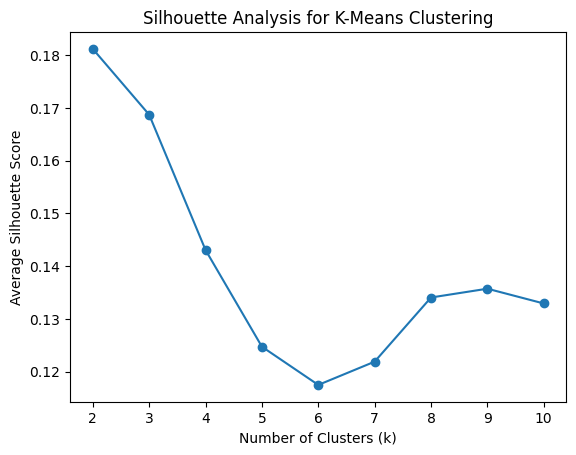

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_avg_values.append(silhouette_avg)

plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()


Based on the Silhouette Analysis K = 2 shows the highest Silhouette score, indicating that the points within the clusters are well-separated and clearly defined at this stage. The score drops significantly as the number of clusters increases, especially between K = 2 and K = 4, suggesting that the clusters become less homogeneous and more dispersed. After K = 4, the Silhouette score stabilizes around 0.12, indicating that there is no significant improvement in the quality of clusters with an increase in the number of clusters beyond this point. The optimal value of K based on the Silhouette Analysis appears to be K = 2, as it provides the highest Silhouette score. However, values of K greater than 2 lead to a significant drop in the score, meaning the clusters become less distinct and more overlapping.

-Elbow Method For Optimal k:

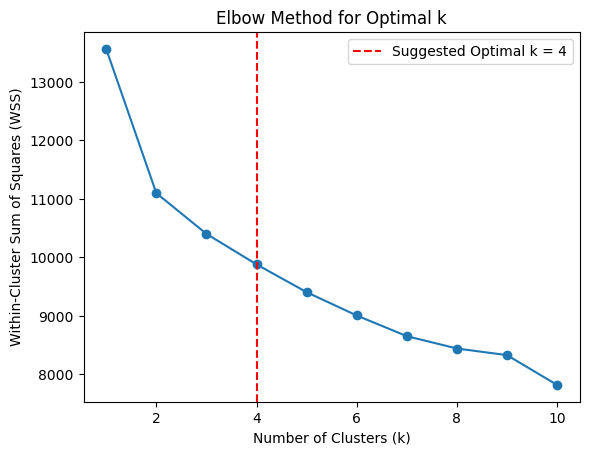

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

df = pd.read_csv('correlated_dataset.csv')  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(scaled_df)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=4, linestyle='--', color='red', label='Suggested Optimal k = 4')  # Adjust manually
plt.legend()
plt.show()


The Elbow Method plot illustrates the relationship between the number of clusters (K) and the Within-Cluster Sum of Squares (WSS). As the number of clusters increases, the WSS initially decreases significantly, indicating a substantial improvement in clustering quality. However, the rate of decrease slows down noticeably after K = 4, forming an elbow shape in the graph. This shape represents the point where further improvements in clustering quality become limited compared to the increase in the number of clusters. Based on this analysis, K = 4 is identified as the optimal number of clusters. At this point, a balance is achieved between reducing WSS and maintaining a simple clustering structure without unnecessary complexity. Increasing the number of clusters beyond K = 4 results in only marginal improvements in clustering quality, making it impractical.